**В качестве итогового проекта я решила проанализировать и обработать датасеты, в которых содержится информация о зарплатах дата аналитиков и специалистов в науках о данных в разных странах в период с 2020 по 2024 год. Датасеты взяты с сайта kaggle.com. Я проинтерпретирую данные, избавлюсь от возможных выбросов, проверю некоторые гипотезы и провизуализирую это с пояснениями.**

1. [Датасет 1](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023) - 3755 значений
2. [Датасет 2](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries) - 606 значений

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Удаляю сообщения о возможных ошибках
import warnings
warnings.filterwarnings("ignore")

Знакомлюсь с датасетами

In [27]:
data1 = pd.read_csv('ds_salaries.csv')
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [26]:
data2 = pd.read_csv('ds_salaries-2.csv')
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [42]:
data2 = data2.rename(columns={'Unnamed: 0': 'Unnamed'})
data2.head() #переименую колонку для последующего удаления

,Unnamed,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Объединяю датасеты - так как у них одинаковые названия переменных, оно корректно объединится в один датасет.

In [46]:
data = pd.concat([data1, data2], axis=0)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Unnamed
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,NaN
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,NaN
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,NaN
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,NaN
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,NaN


**Информация о переменных с обоих датасетов**
1. **work_year**: год, в период которого берётся зарплата; тип данных: int64;
2. **experience_level**: уровень опыта работы на должности в течение года; тип данных: object;
3. **employment_type**: тип занятости для должности; тип данных: object;
4. **job_title**: должность, на которой работали в течение года; тип данных: object;
5. **salary: зарплата**; тип данных: int64;
6. **salary_currency**: валюта выплачиваемой зарплаты в виде кода валюты ISO 4217; тип данных: object;
7. **salary_in_usd**: зарплата в долларах США; тип данных: int64;
8. **employee_residence**: основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166 тип данных: object;
9. **remote_ratio**: общий объем работы, выполненной удаленно; тип данных: int64;
10. **company_location**: cтрана головного офиса или филиала работодателя; тип данных: object;
11. **company_size**: cреднее количество людей, работавших в компании в течение года (Large, Medium, Small); тип данных: object;
12. **Unnamed: 0**: индекс строк с датасета 1, необходимо удалить для корректной работы с данными.

In [48]:
data = data.drop(['Unnamed'], axis=1)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [49]:
data.shape

(4362, 11)

In [50]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Фильтрация

**Фильтрация 1**. Количество компаний в США с крупным размером

In [58]:
data[(data['company_location'] == 'US') & (data['company_size'] == "L")].shape[0]

369

**Вывод**: в выборке содержится 369 специалистов с работой в крупных компаниях, находящихся в США. Это позволяет ближе рассмотреть тренды и особенности зарплат и должностей в этом сегменте рынка труда.

**Фильтрация 2**. Количество компаний в США с зарплатой выше 50 000 USD

In [59]:
data[(data['company_location'] == 'US') & (data['salary_in_usd'] > 50000)].shape[0]

3339

**Вывод**: в выборке содержится 3339 записей о работе в компаниях, расположенных в США, где зарплата превышает 50 000 USD. Эти данные важны для понимания структуры заработной платы и возможностей трудоустройства в высокооплачиваемых американских компаниях.

**Фильтрация 3**. Фильтрация по опыту и типу занятости в крупных компаниях с зарплатой выше средней.

In [60]:
data[(data['company_size'] == 'L') & (data['salary_in_usd'] > data['salary_in_usd'].mean()) & (data['experience_level'].isin(['SE', 'MI']))].shape[0]

212

**Вывод**: в выборке содержится 212 специалистов в крупных компаниях с высокой зарплатой, где требуется опыт на старшем или среднем уровне. Это может быть важным для тех, кто ищет высокооплачиваемую позицию в крупной компании.

**Фильтрация 4**. Фильтрация по очной работе в США.

In [61]:
data[(data['company_location'] == 'US') & (data['remote_ratio'] == 0)].shape[0]

1738

**Вывод**: в нашей выборке есть 1738 записи о работе в компаниях в США, где предусмотрено только очное присутствие сотрудников. Эта информация может быть важной для тех, кто ищет традиционные рабочие условия и предпочитает работать непосредственно на месте.

**Фильтрация 5**. Фильтрация по месту жительства в России или Украине с полной занятостью.

In [62]:
data[(data['employee_residence'].isin(['RU', 'UA']))  & (data['employment_type'] == 'FT')].shape[0]

10

**Вывод**: в нашей выборке всего 10 записей о работе с полной занятостью для сотрудников, проживающих в России или Украине. Это может быть важной информацией для тех, кто ищет работу на полную ставку в этих странах.

### Сортировки

**Сортировка 1**. Сортировка данных по зарплате в порядке убывания

In [63]:
data.sort_values(by='salary_in_usd', ascending=False).head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M


**Вывод**: путем сортировки данных по убыванию зарплаты я выявила, что в наборе данных есть высокооплачиваемые позиции с зарплатой до 600000$.

**Сортировка 2**. Сортировка данных по размеру компании в порядке возрастания

In [64]:
custom_order = {'S' : 0, 'M' : 1,'L' : 2,}
sorted_data = data.sort_values(by='company_size', key=lambda x: x.map(custom_order), ascending=True)
sorted_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
99,2021,MI,FT,Computer Vision Software Engineer,81000,EUR,95746,DE,100,US,S
244,2021,EN,FT,AI Scientist,1335000,INR,18053,IN,100,AS,S
3579,2020,MI,FT,Data Scientist,60000,GBP,76958,GB,100,GB,S
3577,2021,MI,FT,Computer Vision Software Engineer,81000,EUR,95746,DE,100,US,S
3576,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S
...,...,...,...,...,...,...,...,...,...,...,...
3544,2021,EN,FT,Research Scientist,60000,GBP,82528,GB,50,GB,L
3545,2020,EN,FT,Machine Learning Engineer,250000,USD,250000,US,50,US,L
3550,2021,MI,FT,Data Engineer,140000,USD,140000,US,100,US,L
3527,2021,EN,FT,Data Scientist,13400,USD,13400,UA,100,UA,L


**Вывод**: анализируя данные, отсортированные по размеру компании, можно увидеть, какие компании в наборе данных считаются малыми, средними или крупными. Это может быть полезным при рассмотрении структуры компаний, предлагающих вакансии.

**Сортировка 3**. Сортировка данных по зарплате, типу занятости и уровню опыта

In [65]:
data.sort_values(by=['salary_in_usd', 'employment_type', 'experience_level'], ascending=[False, True, False]).head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M


**Вывод**: отсортировала данные по убыванию зарплаты, возрастанию типа занятости и убыванию уровня опыта. Это позволяет нам лучше понять, какие позиции с высокой зарплатой доступны в различных категориях занятости и уровня опыта.

### Частотные таблицы по всем переменным

In [66]:
work_year_freq_table = data['work_year'].value_counts().reset_index()
work_year_freq_table.columns = ['Work Year', 'Frequency']
work_year_freq_table

,Work Year,Frequency
0,2022,1982
1,2023,1785
2,2021,447
3,2020,148


Из частотной таблицы по переменной 'Work Year' видно, что данные о вакансиях преимущественно относятся к 2022 году (1982 записи), за ним следует 2023 год (1785 записей), что может указывать на актуальность предложений в этот период.

In [67]:
experience_level_freq_table = data['experience_level'].value_counts().reset_index()
experience_level_freq_table.columns = ['Experience Level', 'Frequency']
experience_level_freq_table

,Experience Level,Frequency
0,SE,2796
1,MI,1018
2,EN,408
3,EX,140


Из частотной таблицы по переменной 'Experience Level' видно, что большинство вакансий требует опыт на старшем уровне (SE - Senior), что подтверждается высокой частотой - 2796 записей. Позиции с уровнем опыта Middle (MI - Middle) также представлены, но их число меньше - 1018 записей. Уровень опыта Entry (EN - Entry) и Executive (EX - Executive) представлены в меньшем объеме - 408 и 140 записей соответственно.

Это может указывать на высокий спрос на опытных специалистов. Также стоит обратить внимание на потенциальные возможности для специалистов с опытом на среднем уровне, так как позиции с таким требованием тоже востребованы, хотя и в меньшем объеме.

In [68]:
employment_type_freq_table = data['employment_type'].value_counts().reset_index()
employment_type_freq_table.columns = ['Employment Type', 'Frequency']
employment_type_freq_table

,Employment Type,Frequency
0,FT,4306
1,PT,27
2,CT,15
3,FL,14


Из частотной таблицы по переменной 'Employment Type' видно, что большинство вакансий предоставляют полную занятость (FT - Full Time) с высокой частотой в 4306 записей. Меньшее количество вакансий (27) предлагает неполную занятость (PT - Part Time).

Это может указывать на преобладание предложений о работе на полную ставку.

In [69]:
job_title_freq_table = data['job_title'].value_counts().reset_index()
job_title_freq_table.columns = ['Job Title', 'Frequency']
job_title_freq_table

,Job Title,Frequency
0,Data Engineer,1172
1,Data Scientist,983
2,Data Analyst,709
3,Machine Learning Engineer,330
4,Data Architect,112
...,...,...
90,Marketing Data Engineer,1
91,Compliance Data Analyst,1
92,Data Science Tech Lead,1
93,Data Management Specialist,1


Из частотной таблицы по переменной 'Job Title' видно, что наиболее часто встречающимися вакансиями являются Data Engineer, Data Scientist, Data Analyst, Machine Learning Engineer и Data Architect.

Эти позиции, связанные с обработкой данных, анализом и машинным обучением, представлены в высоком объеме, что отражает актуальность и востребованность специалистов в области данных.

In [70]:
salary_currency_freq_table = data['salary_currency'].value_counts().reset_index()
salary_currency_freq_table.columns = ['Salary Currency', 'Frequency']
salary_currency_freq_table

,Salary Currency,Frequency
0,USD,3622
1,EUR,331
2,GBP,205
3,INR,87
4,CAD,43
5,AUD,11
6,PLN,8
7,BRL,8
8,SGD,8
9,JPY,6


Из частотной таблицы по переменной 'Salary Currency' видно, что в большинстве случаев заработная плата представлена в долларах США (USD) - 3622 записи. Другие валюты также представлены, но в меньшем объеме, например, евро (EUR) - 331 запись, фунты стерлингов (GBP) - 205 записей, индийские рупии (INR) - 87 записей, и так далее.

In [71]:
employee_residence_freq_table = data['employee_residence'].value_counts().reset_index()
employee_residence_freq_table.columns = ['Employee Residence', 'Frequency']
employee_residence_freq_table

,Employee Residence,Frequency
0,US,3336
1,GB,211
2,CA,114
3,IN,101
4,ES,95
...,...,...
73,EG,1
74,CR,1
75,MK,1
76,ID,1


Из частотной таблицы по переменной 'Employee Residence' видно, что наибольшее количество вакансий предназначено для сотрудников из США.

In [72]:
remote_ratio_freq_table = data['remote_ratio'].value_counts().reset_index()
remote_ratio_freq_table.columns = ['Remote Ratio', 'Frequency']
remote_ratio_freq_table

,Remote Ratio,Frequency
0,0,2050
1,100,2024
2,50,288


Из частотной таблицы по переменной 'Remote Ratio' видно, что в большинстве случаев сотрудникам предоставляется возможность работать удаленно.
Эти данные могут быть важными для тех, кто активно ищет возможность работы удаленно или, наоборот, предпочитает традиционный офисный формат.

In [73]:
company_location_freq_table = data['company_location'].value_counts().reset_index()
company_location_freq_table.columns = ['Company Location', 'Frequency']
company_location_freq_table

,Company Location,Frequency
0,US,3395
1,GB,219
2,CA,117
3,ES,91
4,DE,84
...,...,...
67,BA,1
68,BS,1
69,CR,1
70,MK,1


Из частотной таблицы по переменной 'Company Location' видно, что большинство вакансий предлагают работу также в США.

In [74]:
company_size_freq_table = data['company_size'].value_counts().reset_index()
company_size_freq_table.columns = ['Company Size', 'Frequency']
company_size_freq_table

,Company Size,Frequency
0,M,3479
1,L,652
2,S,231


Из частотной таблицы по переменной 'Company Size' видно, что большинство вакансий предлагают работу в средних и крупных компаниях.

### Частотные таблицы по ольтфильтрованным данным

Рассмотрю вакансии с опытом работы на уровне Senior (SE), в стране США (US), с предоставлением возможности удаленной работы. Создам соответствующий фильтр и построю частотные таблицы

In [75]:
# Фильтрация данных
filtered_data = data[(data['experience_level'] == 'SE') & (data['employee_residence'] == 'US') & (data['remote_ratio'] == 100)]

# Частотная таблица по типу занятости
employment_type_freq = filtered_data['employment_type'].value_counts().reset_index()
employment_type_freq.columns = ['Employment Type', 'Frequency']

# Частотная таблица по месту работы
company_location_freq = filtered_data['company_location'].value_counts().reset_index()
company_location_freq.columns = ['Company Location', 'Frequency']

print("Частотная таблица по типу занятости:")
print(employment_type_freq)

print("\nЧастотная таблица по месту работы:")
print(company_location_freq)


Частотная таблица по типу занятости:
  Employment Type  Frequency
0              FT       1162
1              CT          3

Частотная таблица по месту работы:
  Company Location  Frequency
0               US       1160
1               CA          2
2               FR          2
3               AU          1


Из результатов анализа отфильтрованных данных видно, что вакансии с опытом работы на уровне Senior (SE) в США (US) и предоставлением 100% удаленной работы в основном предлагают полную занятость (FT) и чаще расположены в США, что может быть важным для тех, кто ищет конкретные условия трудоустройства с указанными фильтрами.

Рассмотрю фильтрацию для других столбцов. Например, посмотрю на вакансии в крупных компаниях (Company Size = 'L') с высокой зарплатой (Salary in USD > 100000) без возможности удаленной работы (Remote Ratio == 0).

In [76]:
# Фильтрация данных
filtered_data_large_no_remote_high_salary = data[(data['company_size'] == 'L') & (data['salary_in_usd'] > 100000) & (data['remote_ratio'] == 0)]

# Частотная таблица по должностям
job_title_freq_large_no_remote_high_salary = filtered_data_large_no_remote_high_salary['job_title'].value_counts().reset_index()
job_title_freq_large_no_remote_high_salary.columns = ['Job Title', 'Frequency']

# Частотная таблица по месту работы
company_location_freq_large_no_remote_high_salary = filtered_data_large_no_remote_high_salary['company_location'].value_counts().reset_index()
company_location_freq_large_no_remote_high_salary.columns = ['Company Location', 'Frequency']

# Вывод результатов
print("Частотная таблица по должностям (Large, High Salary, Remote == 0%):")
print(job_title_freq_large_no_remote_high_salary)

print("\nЧастотная таблица по месту работы (Large, High Salary, Remote == 0%):")
print(company_location_freq_large_no_remote_high_salary)


Частотная таблица по должностям (Large, High Salary, Remote == 0%):
                             Job Title  Frequency
0                       Data Scientist         31
1                    Applied Scientist         29
2                        Data Engineer         21
3                         Data Analyst          4
4            Machine Learning Engineer          4
5             Director of Data Science          4
6                 Data Science Manager          3
7               Data Analytics Manager          3
8             Principal Data Scientist          2
9               Applied Data Scientist          2
10                  Lead Data Engineer          2
11                 Lead Data Scientist          2
12                        AI Scientist          1
13            Deep Learning Researcher          1
14  Applied Machine Learning Scientist          1
15            Data Engineering Manager          1

Частотная таблица по месту работы (Large, High Salary, Remote == 0%):
  Company L

Из результатов анализа отфильтрованных данных (Large, High Salary, Remote == 0%) видно, что вакансии в крупных компаниях с высокой зарплатой и без возможности удаленной работы в основном представлены позициями, такими как Data Scientist и Applied Scientist, и в большей части находятся в США. Это может быть важной информацией для кандидатов, ищущих высокооплачиваемые, традиционного формата работы вакансии в крупных компаниях.

### Создание переменных

1. Cоздам свою собственную переменную на основе зарплаты в USD
Предположим, я хочу создать переменную "Income_Category", которая будет иметь две категории: "Высокий доход" для зарплаты выше или равной 100000 долларов и "Низкий доход" для зарплаты ниже 100000 долларов.

In [77]:
data['Income_Category'] = data['salary_in_usd'].apply(lambda x: 'High Income' if x >= 100000 else 'Low Income')

# Частотная таблица по новой переменной
income_category_freq = data['Income_Category'].value_counts().reset_index()
income_category_freq.columns = ['Income Category', 'Frequency']

print("Частотная таблица по переменной 'Income_Category':")
print(income_category_freq)
data.head()

Частотная таблица по переменной 'Income_Category':
  Income Category  Frequency
0     High Income       3084
1      Low Income       1278


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Income_Category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Low Income
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Low Income
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Low Income
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,High Income
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,High Income


Из результатов анализа созданной переменной 'Income_Category' видно, что данные разделены на две категории: "High Income" и "Low Income" на основе условия дохода выше или равного $100000. Это может быть полезным для дополнительного анализа и понимания распределения доходов в наборе данных.

2. Создам переменную "Remote_Category" на основе столбца "Remote Ratio". Разделю вакансии на 3 категории: "Удаленная работа" (Remote), "Работа из офиса" (Office) и "Гибридная работа" (Hybrid).

In [78]:
data['Remote_Category'] = data['remote_ratio'].apply(lambda x: 'Remote' if x > 0 and x != 50 else 'Hybrid' if x == 50 else 'Office')

# Частотная таблица по новой переменной
remote_category_freq_updated = data['Remote_Category'].value_counts().reset_index()
remote_category_freq_updated.columns = ['Remote Category', 'Frequency']

print("Частотная таблица по переменной 'Remote_Category' с учетом гибридной категории:")
print(remote_category_freq_updated)
data.head()

Частотная таблица по переменной 'Remote_Category' с учетом гибридной категории:
  Remote Category  Frequency
0          Office       2050
1          Remote       2024
2          Hybrid        288


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Income_Category,Remote_Category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Low Income,Remote
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Low Income,Remote
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Low Income,Remote
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,High Income,Remote
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,High Income,Remote


Теперь даныне разделены на три категории: "Remote", "Hybrid" и "Office" в зависимости от каегории формата работы. Категория формата работы делится на удалённый (100), гибридный (50) или офисный (0). Это может быть полезным для дополнительного анализа и лучшего понимания различий в предложениях о работе в зависимости от удобства конкретного графика.

## Расчет мер центральной тенденции

### МЦТ

Рассчитаю меры центральной тенденции для созданной переменной "Remote_Category". Для категориальной переменной использую моду, так как она имеет ограниченное количество значений.

In [79]:
from statistics import mode

# Расчет моды для "Remote_Category"
remote_category_mode = data['Remote_Category'].mode()
print(f"Мода для переменной 'Remote_Category': {remote_category_mode}")

Мода для переменной 'Remote_Category': 0    Office
Name: Remote_Category, dtype: object


Для переменной "Remote_Category" мода указывает на категорию Office с наибольшей частотой в распределении категорий формата работы.

In [80]:
# Числовые переменные
work_year_median = data['work_year'].median()
salary_in_usd_median = data['salary_in_usd'].median()
salary_in_usd_mean = data['salary_in_usd'].mean()

print(f"Медиана для года работы (work_year): {work_year_median}")
print(f"Медиана зарплаты в USD (salary_in_usd): {salary_in_usd_median}")
print(f"Среднее зарплаты в USD (salary_in_usd): {salary_in_usd_mean}")

Медиана для года работы (work_year): 2022.0
Медиана зарплаты в USD (salary_in_usd): 130000.0
Среднее зарплаты в USD (salary_in_usd): 134053.55823016964


Медианный год работы в наборе данных – 2022

Медиана зарплаты в USD, которая показывает значение, при котором 50% данных находится выше, а 50% - ниже – 130000$. Распределение зарплаты указано графиком ниже.

Среднее зарплаты в USD – 134053.55823016964$

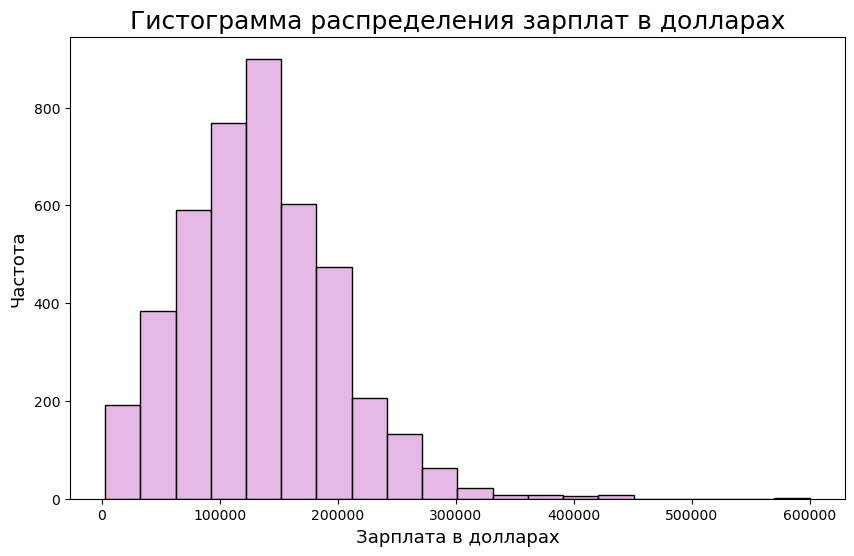

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins = 20, color = '#DDA0DD')
plt.title('Гистограмма распределения зарплат в долларах', fontsize = 18)
plt.xlabel('Зарплата в долларах', fontsize = 13)
plt.ylabel('Частота', fontsize = 13)
plt.show()

In [82]:
# Категориальные переменные
experience_level_mode = mode(data['experience_level'])
employment_type_mode = mode(data['employment_type'])
employee_residence_mode = mode(data['employee_residence'])
company_location_mode = mode(data['company_location'])
company_size_mode = mode(data['company_size'])
income_category_mode = mode(data['Income_Category'])
salary_currency_mode = mode(data['salary_currency'])

print(f"Мода уровня опыта (experience_level): {experience_level_mode}")
print(f"Мода типа занятости (employment_type): {employment_type_mode}")
print(f"Мода места проживания (employee_residence): {employee_residence_mode}")
print(f"Мода места работы (company_location): {company_location_mode}")
print(f"Мода размера компании (company_size): {company_size_mode}")
print(f"Мода категории дохода (Income_Category): {income_category_mode}")
print(f"Мода валюты зарплаты (salary_currency): {salary_currency_mode}")

Мода уровня опыта (experience_level): SE
Мода типа занятости (employment_type): FT
Мода места проживания (employee_residence): US
Мода места работы (company_location): US
Мода размера компании (company_size): M
Мода категории дохода (Income_Category): High Income
Мода валюты зарплаты (salary_currency): USD


experience_level (Уровень опыта): Мода "SE" указывает на то, что в данном наборе данных наиболее часто встречаются вакансии с опытом работы на уровне Senior (SE).

employment_type (Тип занятости): Мода "FT" говорит о том, что наиболее распространенными являются вакансии с полной занятостью (FT).

employee_residence (Место проживания сотрудника): Мода "US" указывает на то, что большинство вакансий предназначено для кандидатов, проживающих в США.

company_location (Место работы компании): Мода "US" означает, что наиболее часто встречаются вакансии в компаниях, расположенных в США.

company_size (Размер компании): Мода "M" указывает на то, что в данном наборе данных наиболее распространены вакансии в средних компаниях.

Income_Category (Категория дохода): Мода "High Income" говорит о том, что большинство вакансий связаны с категорией высокого дохода.

## Работа с выбросами

Построю "ящики с усами" для числовых переменных, чтобы посмотреть есть ли выбросы, визуально.

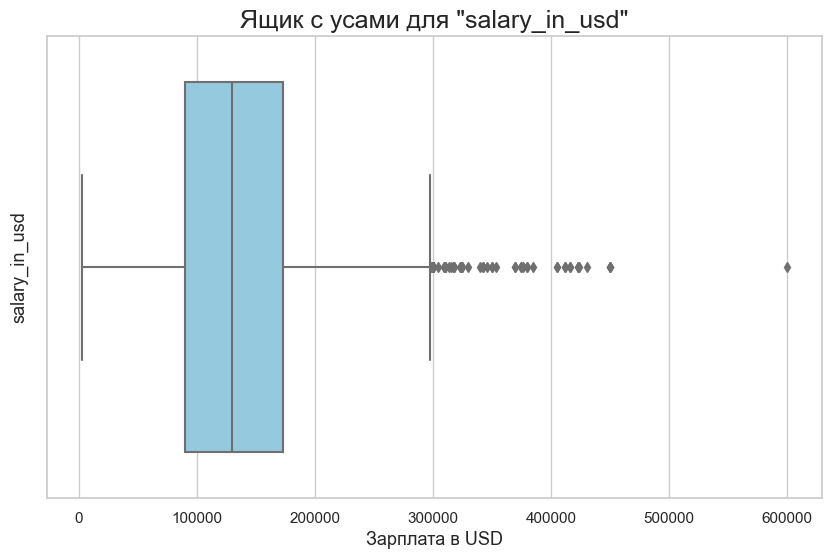

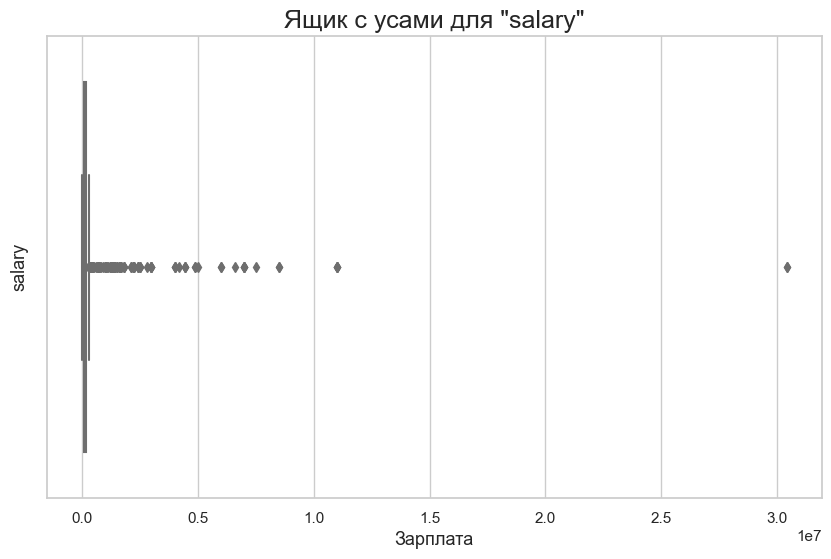

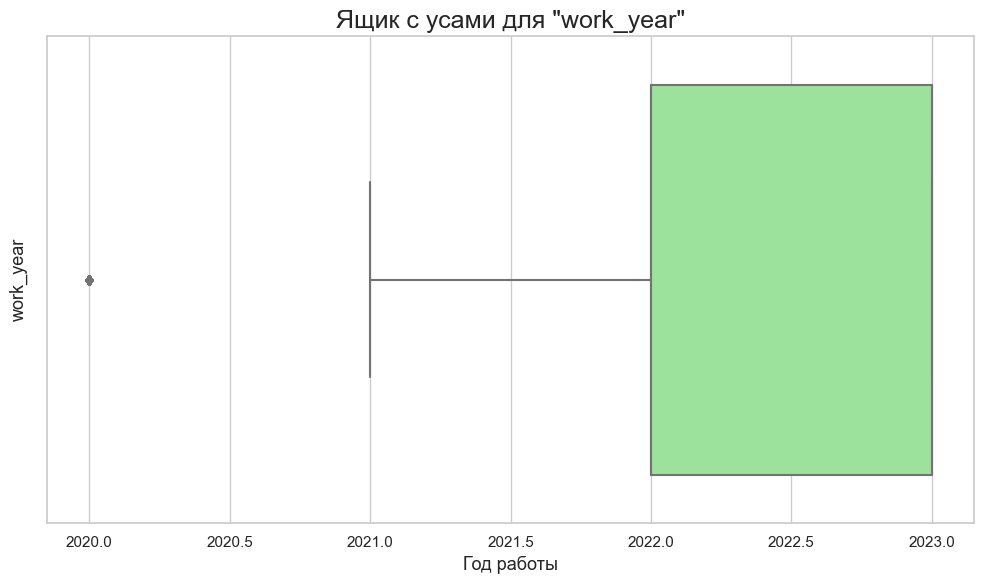

In [83]:
sns.set(style="whitegrid")

# Ящик с усами для "salary_in_usd"
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary_in_usd', data=data, color='skyblue')
plt.title('Ящик с усами для "salary_in_usd"', fontsize=18)
plt.xlabel('Зарплата в USD',fontsize=13)
plt.ylabel('salary_in_usd',fontsize=13)

# Ящик с усами для "salary"
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', data=data, color='lightcoral')
plt.title('Ящик с усами для "salary"', fontsize=18)
plt.xlabel('Зарплата',fontsize=13)
plt.ylabel('salary',fontsize=13)

# Ящик с усами для "work_year"
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_year', data=data, color='lightgreen')
plt.title('Ящик с усами для "work_year"', fontsize=18)
plt.xlabel('Год работы',fontsize=13)
plt.ylabel('work_year',fontsize=13)

plt.tight_layout()
plt.show()

График позволяет оценить распределение зарплат в USD. Верхний ус указывает на максимальное значение, нижний - на минимальное. Отмечены точки, которые являются потенциальными выбросами (значениями, находящимися далеко от медианы). Выбросы могут быть связаны с необычно высокими или низкими зарплатами.

Выбросы по параметру года работы существуют. Отклонения находятся в диапазоне до 2021 года.

Выбросы по параметру зарплаты существенны и занимают большую часть графика из-за большого масштаба разброса.

Выбросы по параметру зарплаты в долларах находятся также по правую сторону графика и относятся к зарплате от ~290000$ и выше.

Далее их следует обработать, чтобы добиться точности при анализе среднестатистического работника.

### Расчет интерквартильного размаха

In [84]:
salary_in_usd = data['salary_in_usd']

# Межквартильный размах
q1 = salary_in_usd.quantile(0.25)
q3 = salary_in_usd.quantile(0.75)
iqr = q3 - q1

# Границы для определения выбросов по межквартильному размаху
lower_bound_iqr = q1 - 1.5 * iqr
upper_bound_iqr = q3 + 1.5 * iqr

# Среднеквадратичное отклонение от среднего
mean_salary_in_usd = salary_in_usd.mean()
std_dev = salary_in_usd.std()
print(mean_salary_in_usd)
print(std_dev)

# Границы для определения выбросов по среднеквадратичному отклонению
lower_bound_std = mean_salary_in_usd - 2 * std_dev
upper_bound_std = mean_salary_in_usd + 2 * std_dev

# Выбросы по межквартильному размаху
outliers_iqr = salary_in_usd[(salary_in_usd < lower_bound_iqr) | (salary_in_usd > upper_bound_iqr)]

# Выбросы по среднеквадратичному отклонению
outliers_std = salary_in_usd[(salary_in_usd < lower_bound_std) | (salary_in_usd > upper_bound_std)]

print("Выбросы по межквартильному размаху:")
print(outliers_iqr)
print("\nВыбросы по среднеквадратичному отклонению:")
print(outliers_std)

134053.55823016964
64797.957697389895
Выбросы по межквартильному размаху:
33     342810
68     309400
83     300000
133    342300
145    318300
        ...  
225    416000
252    600000
482    324000
519    380000
523    405000
Name: salary_in_usd, Length: 68, dtype: int64

Выбросы по среднеквадратичному отклонению:
21     275000
33     342810
44     270703
50     275300
68     309400
        ...  
252    600000
482    324000
519    380000
523    405000
534    266400
Name: salary_in_usd, Length: 125, dtype: int64


**Межквартильный размах**: Выбросы определяются по границам, находящимся за пределами 1.5 межквартильных размаха от первого и третьего квартиля. В данном случае, значения за пределами этих границ считаются выбросами.

**Среднеквадратичное отклонение**: Выбросы определяются по границам, находящимся за пределами 2 среднеквадратичных отклонений от среднего значения. Здесь, значения за пределами этих границ считаются выбросами.

Выбросы по межквартильному размаху и среднеквадратичному отклонению отличаются по числу и значениям. Межквартильный размах определяет более узкий диапазон выбросов, чем среднеквадратичное отклонение.

Различия могут быть обусловлены разными методами определения выбросов. Межквартильный размах основывается на квартилях и менее чувствителен к выбросам в хвостах распределения, в то время как среднеквадратичное отклонение более чувствительно к отклонениям от среднего значения.

### Расчёт мцт до и после удаление выбросов

Выбор 2 стандартных отклонений обусловлен тем, что в нормальном распределении примерно 95% данных находятся в пределах двух стандартных отклонений от среднего. Таким образом, использование 2 стандартных отклонений позволяет выделить относительно "экстремальные" значения.

Если использовать 3 стандартных отклонения, это охватит более широкий диапазон данных, примерно 99.7% данных в нормальном распределении. Однако это может быть слишком консервативным подходом, поэтому выбросы, лежащие за пределами 2 стандартных отклонений, могут быть более интересными для исследования.

In [89]:
# Расчет медианы и среднего для переменной "salary_in_usd" до удаления выбросов
median_salary_in_usd_before = data['salary_in_usd'].median()
mean_salary_in_usd_before = data['salary_in_usd'].mean()

# Вывод результатов
print(f"Среднее значение salary_in_usd до удаления выбросов: {mean_salary_in_usd_before}")
print(f"Медиана salary_in_usd до удаления выбросов: {median_salary_in_usd_before}")

# Копирование данных, чтобы не изменять оригинальный набор данных
data_no_outliers = data.copy()

# Удаление выбросов по межквартильному размаху
data_no_outliers = data_no_outliers[(data_no_outliers['salary_in_usd'] >= lower_bound_iqr) & (data_no_outliers['salary_in_usd'] <= upper_bound_iqr)]

# Повторный расчет мер центральной тенденции
mean_salary_in_usd_no_outliers = data_no_outliers['salary_in_usd'].mean()
median_salary_in_usd_no_outliers = data_no_outliers['salary_in_usd'].median()

# Вывод результатов
print(f"\nСреднее значение salary_in_usd после удаления выбросов: {mean_salary_in_usd_no_outliers}")
print(f"Медиана salary_in_usd после удаления выбросов: {median_salary_in_usd_no_outliers}")


Среднее значение salary_in_usd до удаления выбросов: 134053.55823016964
Медиана salary_in_usd до удаления выбросов: 130000.0

Среднее значение salary_in_usd после удаления выбросов: 130685.9524918491
Медиана salary_in_usd после удаления выбросов: 130000.0


In [90]:
# Копирование данных, чтобы не изменять оригинальный набор данных
data_no_outliers_std = data.copy()

# Удаление выбросов по стандартному отклонению
data_no_outliers_std = data_no_outliers_std[(data_no_outliers_std['salary_in_usd'] >= lower_bound_std) & (data_no_outliers_std['salary_in_usd'] <= upper_bound_std)]

# Повторный расчет мер центральной тенденции
mean_salary_in_usd_no_outliers_std = data_no_outliers_std['salary_in_usd'].mean()
median_salary_in_usd_no_outliers_std = data_no_outliers_std['salary_in_usd'].median()

# Вывод результатов
print(f"\nСреднее значение salary_in_usd после удаления выбросов по стандартному отклонению: {mean_salary_in_usd_no_outliers_std}")
print(f"Медиана salary_in_usd после удаления выбросов по стандартному отклонению: {median_salary_in_usd_no_outliers_std}")



Среднее значение salary_in_usd после удаления выбросов по стандартному отклонению: 128877.3792777909
Медиана salary_in_usd после удаления выбросов по стандартному отклонению: 130000.0


Результаты показывают, что после удаления выбросов среднее значение и медиана стали ближе друг к другу, что может указывать на более стабильное распределение данных.

Замечу, что среднее и медиана у метода стандартных отклонений слегка меньше после обработки выбросов нежели у межквартильного размаха. Стандартное отклонение в целом сильнее подвержено влиянию экстремальных значений, поскольку оно учитывает каждое отклонение от среднего, в то время как IQR фокусируется на центральных 50% данных.

### Гистограмма без учета выбросов и после их удаления

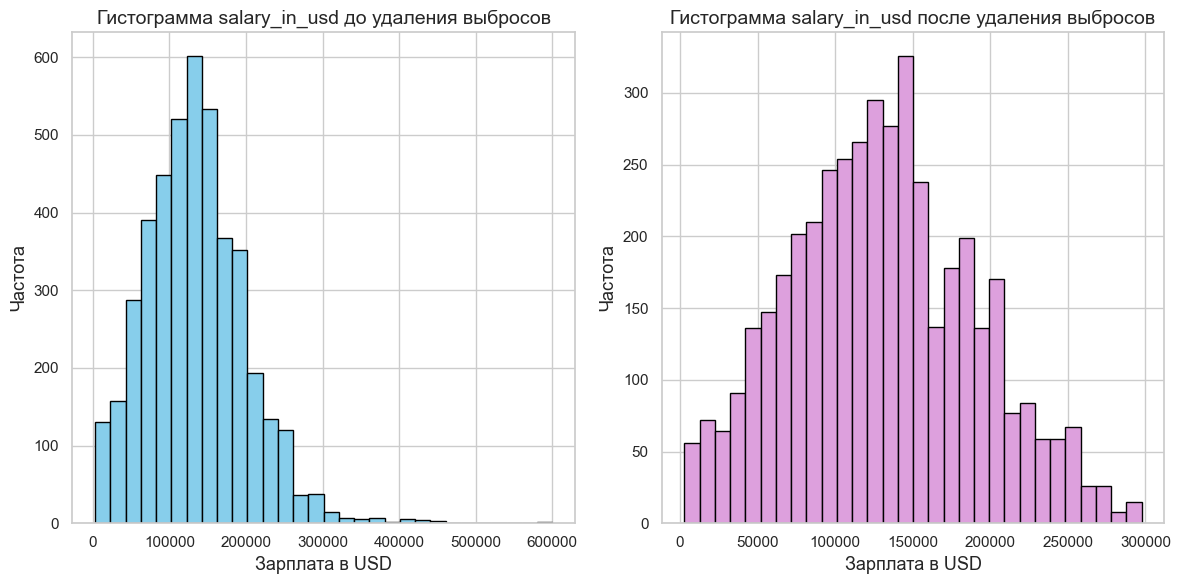

In [92]:
# Гистограмма до удаления выбросов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.title('Гистограмма salary_in_usd до удаления выбросов', fontsize = 14)
plt.xlabel('Зарплата в USD', fontsize = 13)
plt.ylabel('Частота', fontsize = 13)

# Гистограмма после удаления выбросов
plt.subplot(1, 2, 2)
plt.hist(data_no_outliers['salary_in_usd'], bins=30, color= '#DDA0DD', edgecolor='black')
plt.title('Гистограмма salary_in_usd после удаления выбросов', fontsize = 14)
plt.xlabel('Зарплата в USD', fontsize = 13)
plt.ylabel('Частота', fontsize = 13)

plt.tight_layout()
plt.show()

### Пропущенные значения

Проверю, остались ли пропущенные значения в нашем датасете.

In [93]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
Income_Category       0
Remote_Category       0
dtype: int64

Пропущенных данных, к счастью, нет.

# Корреляция

Построю корреляционную матрицу по всем числовым признакам: work year, salary, salary in usd и remote ratio.

In [94]:
correlation_matrix = data.corr().round(2)
correlation_matrix

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.00,-0.10,0.25,-0.25
salary,-0.10,1.00,-0.05,0.03
salary_in_usd,0.25,-0.05,1.00,-0.06
remote_ratio,-0.25,0.03,-0.06,1.00


Визуализирую корреляционную матрицу

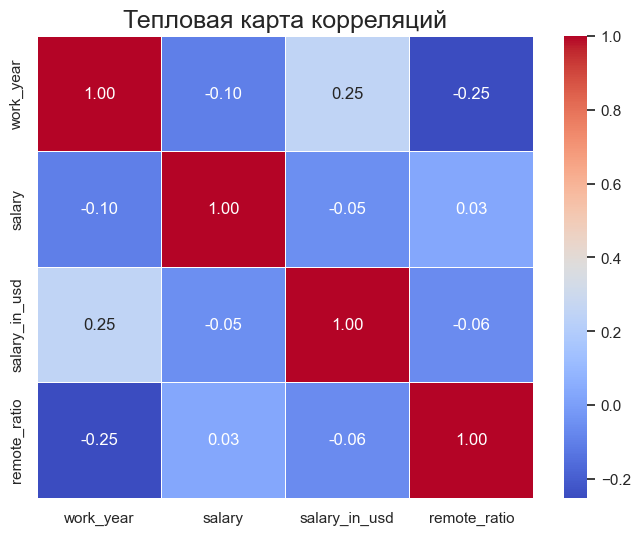

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Тепловая карта корреляций', fontsize = 18)
plt.show()

1. **work_year и salary (-0.10):**
   Слабая отрицательная корреляция между годом работы и зарплатой.

2. **work_year и salary_in_usd (0.25):**
   Умеренная положительная корреляция между годом работы и зарплатой в долларах США.

3. **work_year и remote_ratio (-0.25):**
   Слабая отрицательная корреляция между годом работы и соотношением удаленной работы.

4. **salary и salary_in_usd (-0.05):**
   Очень слабая отрицательная корреляция между зарплатой и зарплатой в долларах США.

5. **salary и remote_ratio (0.03):**
   Очень слабая положительная корреляция между зарплатой и соотношением удаленной работы.

6. **salary_in_usd и remote_ratio (-0.06):**
    Очень слабая отрицательная корреляция между зарплатой в долларах США и соотношением удаленной работы.

Text(0.5, 1.0, 'График рассеяния корреляции между годом работы и зарплатой в долларах')

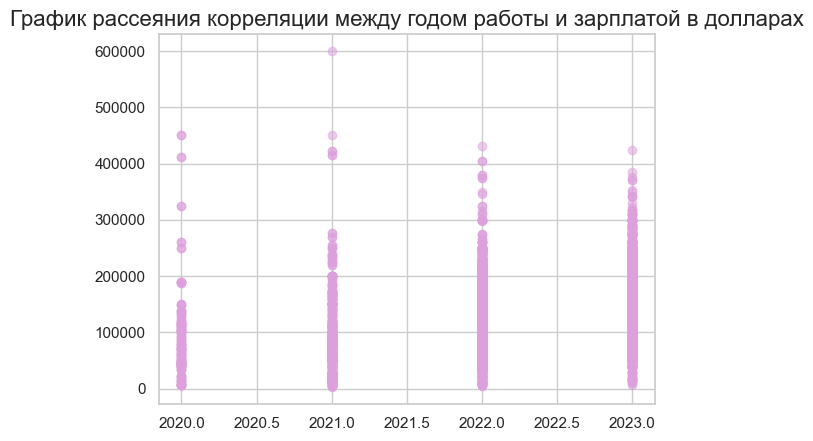

In [99]:
fig, ax = plt.subplots() #Построю график рассеяния корреляции между годом работы и зарплатой в долларах
ax.scatter(data['work_year'], data['salary_in_usd'], alpha = 0.5, color = '#DDA0DD')
ax.set_title("График рассеяния корреляции между годом работы и зарплатой в долларах", fontsize = 16)

Так, мне удалось объединить 2 набора данных и проанализировать их с точки зрения среднестатистического работника, удалить выбросы и визуализировать полученные результаты.